In [1]:
import gurobipy as gp
from gurobipy import GRB
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt

np.random.seed(99)

In [2]:
import numpy as np
import random
n = 10
# replace dig1 with the second-to-last digit of your registration number
# replace dig2 with the last digit of your registration number
dig1 = 5
dig2 = 4
dummyrepetitions = 10*dig1+dig2
for _ in range(dummyrepetitions):
    dummy = random.uniform(0,1)
Corr = np.array([[0]*n for _ in range(n)], dtype = float)
for i in range(n):
    for j in range(n):
        Corr[i][j] = (-1)**abs(i-j)/(abs(i-j)+1)
ssigma = np.array([[0]*1 for _ in range(n)], dtype = float)
# mmu is the vector μ in the assignment
mmu = np.array([[0]*1 for _ in range(n)], dtype = float)
ssigma[0] = 2
mmu[0] = 3
for i in range(n-1):
    ssigma[i+1] = ssigma[i] + 2*random.uniform(0,1)
    mmu[i+1] = mmu[i] + 1
ddiag = np.array([[0]*n for _ in range(n)], dtype = float)
np.fill_diagonal(ddiag, ssigma)
C2 = np.matmul(np.matmul(ddiag,Corr), ddiag)
# C is the matrix C in the assignment
C = 0.5*(C2 + C2.T)

## Building the model

In [3]:
r_values = np.arange(2.00, 9.25, 0.25) #Return values
mu = mmu.flatten()

def model(constraint1, constraint2, lowerBound, upperBound):
    sigma_values = []
    mu_values = []
    for r in r_values:
        m = gp.Model() # initialize the model 
        x = m.addMVar(n, lb = lowerBound, ub = upperBound) # initialize the variable for asset allocation
    
        m.setObjective(x @ C @ x, GRB.MINIMIZE) # set the objective

        m.addConstr(constraint1(mu, x, r), "Return constraint") # Constraint 1
        m.addConstr(constraint2(x), "Fund constraint") # Constraint 2

        m.optimize() # optimize the objective function under set constraints

        if m.status == GRB.OPTIMAL:
            x_opt = x.X
            sigma_values.append(np.sqrt(x_opt @ C @ x_opt)) # Get assocated risk
            mu_values.append(mu @ x_opt) # Get associated return
        else:
            sigma_values.append(None)
            mu_values.append(None)
    return (sigma_values, mu_values)

def GetMinimumRiskPortfolio(C, constraint, lowerbound): # minimum risk for any amount of return under task constraints
    m = gp.Model()
    x = m.addMVar(n, lb=lowerbound)# initialize the variable for asset allocation
    m.setObjective(x @ C @ x, GRB.MINIMIZE)# set the objective
    m.addConstr(constraint(x), 'Fund constraint')# Constraint 1
    m.optimize()# optimize the objective function under set constraints
    minrisk_volatility = sqrt(m.ObjVal)  # Get assocated risk
    minrisk_return = mu @ x.X # Get associated return
    
    return(minrisk_volatility, minrisk_return)

### Task 1

In [4]:
def constraint1_task1(mu,x,r):
    return (mu @ x == r)

def constraint2_Task1(x):
    return (gp.quicksum(x) == 1)

sigma_values1, mu_values1 = model(constraint1_task1, constraint2_Task1, 0, GRB.INFINITY)
minrisk_volatility, minrisk_return = GetMinimumRiskPortfolio(C, constraint2_Task1, 0)

Restricted license - for non-production use only - expires 2025-11-24
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 10 columns and 20 nonzeros
Model fingerprint: 0xe00841f1
Model has 55 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e+00, 3e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+00]
Presolve time: 0.01s
Presolved: 2 rows, 10 columns, 20 nonzeros
Presolved model has 55 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 9
 AA' NZ     : 5.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   

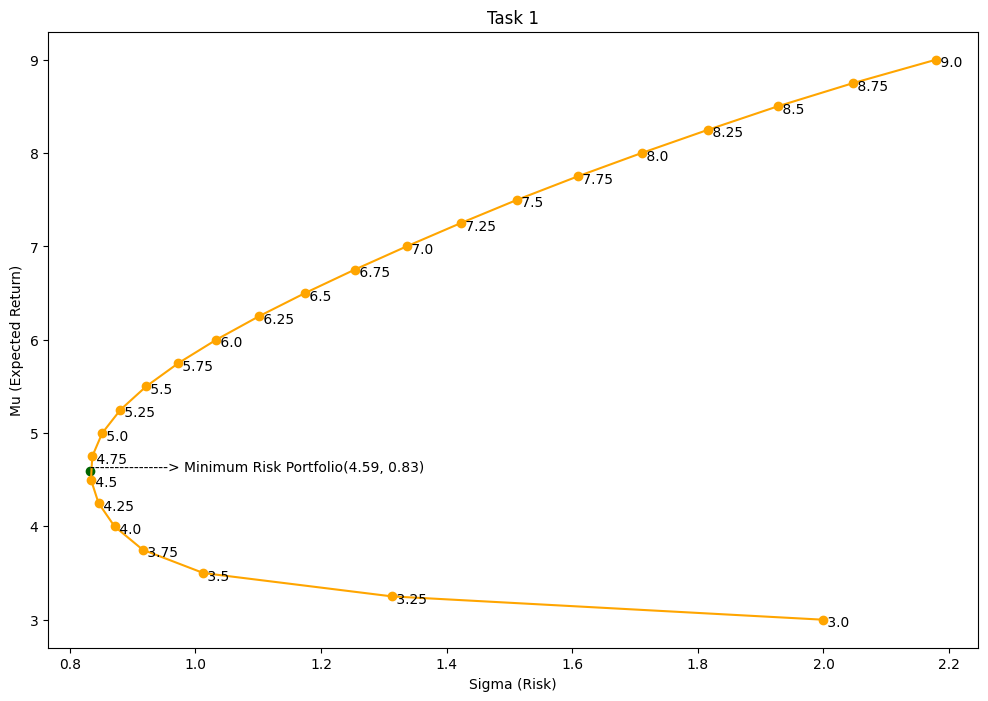

In [5]:
plt.figure(figsize=(12, 8))

plt.plot(sigma_values1, mu_values1, 'o-', label='Task 1', color='orange')
plt.title('Task 1')
plt.xlabel('Sigma (Risk)')
plt.ylabel('Mu (Expected Return)')

for i, r in enumerate(r_values):
    if (sigma_values1[i] is not None) or (mu_values1[i] is not None):
        plt.annotate(f' {r_values[i]}', (sigma_values1[i], mu_values1[i]), textcoords="offset points", xytext=(0,-5), ha='left')

# Plot volatility versus expected return for minimum risk portfolio
plt.scatter(x=minrisk_volatility, y=minrisk_return, color='DarkGreen')
plt.annotate(f'----------------> Minimum Risk Portfolio{ (round(minrisk_return, 2), round(minrisk_volatility, 2))}', (minrisk_volatility, minrisk_return),
            horizontalalignment='left')  
    
plt.show()

### Task 2

In [6]:
def constraint1_task2(mu,x,r):
    return (mu @ x == r)

def constraint2_Task2(x):
    return (gp.quicksum(x) <= 1)

sigma_values2, mu_values2 = model(constraint1_task2, constraint2_Task2, 0, GRB.INFINITY)
minrisk_volatility, minrisk_return = GetMinimumRiskPortfolio(C, constraint2_Task2, 0)

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 10 columns and 20 nonzeros
Model fingerprint: 0x252b9f86
Model has 55 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e+00, 3e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+00]
Presolve time: 0.01s
Presolved: 2 rows, 10 columns, 20 nonzeros
Presolved model has 55 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 9
 AA' NZ     : 5.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.24511107e+07 -1.24511107e+07  7.62e+03 4.77e-08  1.00e+06     0s
   

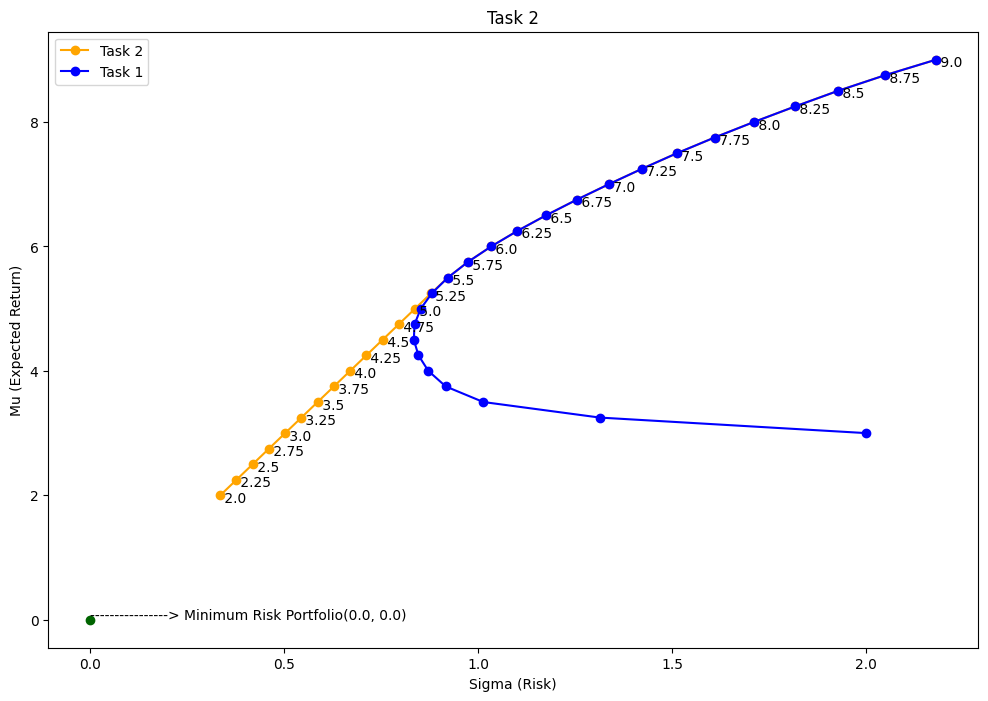

In [7]:
plt.figure(figsize=(12, 8))

plt.plot(sigma_values2, mu_values2, 'o-', label='Task 2', color='orange')
plt.plot(sigma_values1, mu_values1, 'o-', label='Task 1', color='blue')
plt.title('Task 2')
plt.xlabel('Sigma (Risk)')
plt.ylabel('Mu (Expected Return)')
plt.legend()
for i, r in enumerate(r_values):
    if (sigma_values2[i] is not None) or (mu_values2[i] is not None):
        plt.annotate(f' {r_values[i]}', (sigma_values2[i], mu_values2[i]), textcoords="offset points", xytext=(0,-5), ha='left')

# Plot volatility versus expected return for minimum risk portfolio
plt.scatter(x=minrisk_volatility, y=minrisk_return, color='DarkGreen')
plt.annotate(f'----------------> Minimum Risk Portfolio{ (round(minrisk_return, 2), round(minrisk_volatility, 2))}', (minrisk_volatility, minrisk_return),
            horizontalalignment='left')  
plt.show()

### Task 3

In [8]:
def constraint1_task3(mu,x,r):
    return (mu @ x >= r)

def constraint2_Task3(x):
    return (gp.quicksum(x) == 1)

sigma_values3, mu_values3 = model(constraint1_task3, constraint2_Task3, 0, GRB.INFINITY)
minrisk_volatility, minrisk_return = GetMinimumRiskPortfolio(C, constraint2_Task3, 0)

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 10 columns and 20 nonzeros
Model fingerprint: 0x9538c66e
Model has 55 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e+00, 3e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+00]
Presolve time: 0.01s
Presolved: 2 rows, 10 columns, 20 nonzeros
Presolved model has 55 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 9
 AA' NZ     : 5.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   1.24548732e+07 -1.24548732e+07  5.00e+03 9.13e-08  1.00e+06     0s
   

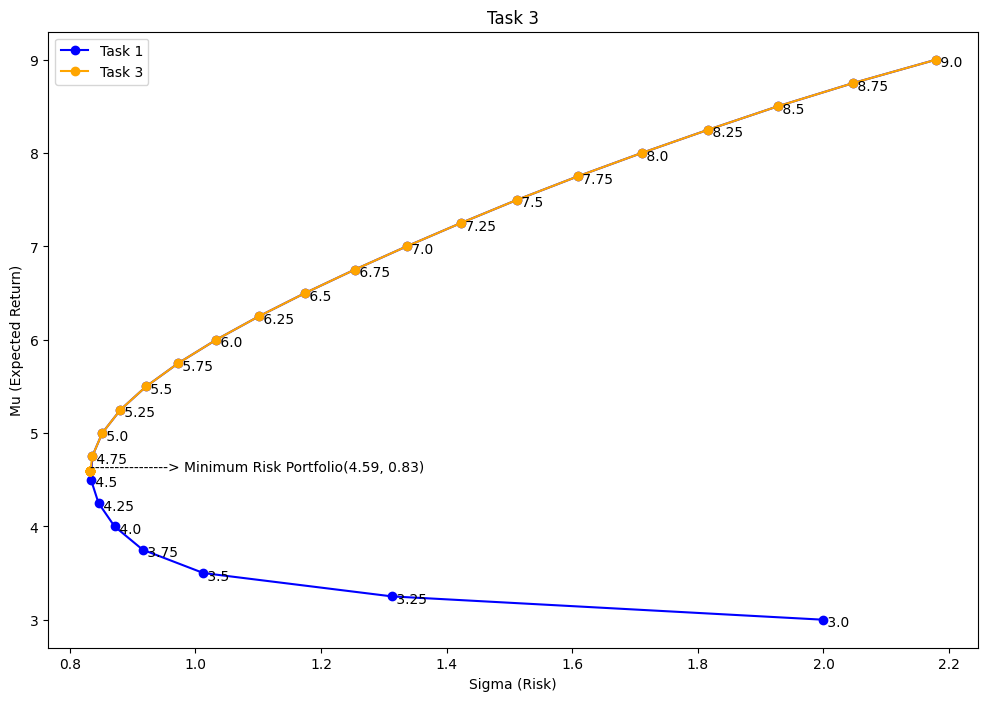

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(sigma_values1, mu_values1, 'o-', label='Task 1', color='blue')
plt.plot(sigma_values3, mu_values3, 'o-', label='Task 3', color='orange')
plt.legend()
plt.title('Task 3')
plt.xlabel('Sigma (Risk)')
plt.ylabel('Mu (Expected Return)')

for i, r in enumerate(r_values):
    if (sigma_values1[i] is not None) or (mu_values1[i] is not None):
        plt.annotate(f' {r_values[i]}', (sigma_values1[i], mu_values1[i]), textcoords="offset points", xytext=(0,-5), ha='left')

# Plot volatility versus expected return for minimum risk portfolio
plt.scatter(x=minrisk_volatility, y=minrisk_return, color='DarkGreen')
plt.annotate(f'----------------> Minimum Risk Portfolio{ (round(minrisk_return, 2), round(minrisk_volatility, 2))}', (minrisk_volatility, minrisk_return),
            horizontalalignment='left')  
plt.show()

### Task 4

In [10]:
def constraint1_task4(mu,x,r):
    return (mu @ x == r)

def constraint2_Task4(x):
    return (gp.quicksum(x) == 1)

sigma_values4, mu_values4 = model(constraint1_task4, constraint2_Task4, -GRB.INFINITY, GRB.INFINITY)
minrisk_volatility, minrisk_return = GetMinimumRiskPortfolio(C, constraint2_Task4, -GRB.INFINITY)

Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (mac64[arm] - Darwin 23.5.0 23F79)

CPU model: Apple M1
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 2 rows, 10 columns and 20 nonzeros
Model fingerprint: 0x7f122ec0
Model has 55 quadratic objective terms
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [0e+00, 0e+00]
  QObjective range [8e+00, 3e+02]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 2e+00]
Presolve time: 0.00s
Presolved: 2 rows, 10 columns, 20 nonzeros
Presolved model has 55 quadratic objective terms
Ordering time: 0.00s

Barrier statistics:
 Free vars  : 19
 AA' NZ     : 5.500e+01
 Factor NZ  : 6.600e+01
 Factor Ops : 5.060e+02 (less than 1 second per iteration)
 Threads    : 1

                  Objective                Residual
Iter       Primal          Dual         Primal    Dual     Compl     Time
   0   2.05907483e+00 -2.05907483e+00  7.77e-16 1.22e-01  0.00e+00     0s
  

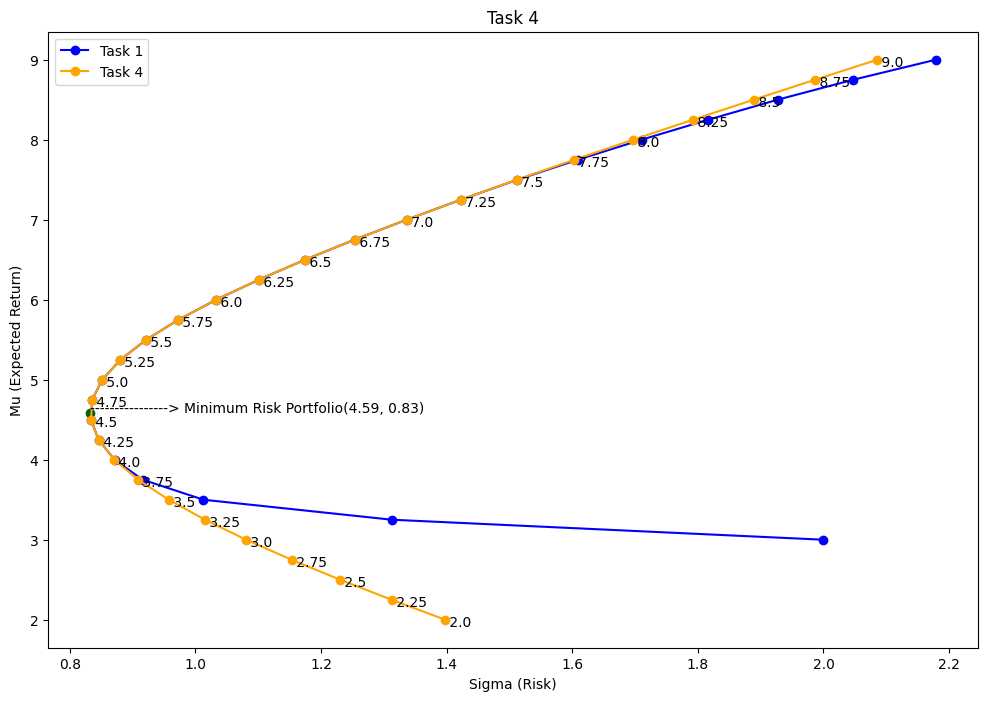

In [11]:
plt.figure(figsize=(12, 8))

plt.plot(sigma_values1, mu_values1, 'o-', label='Task 1', color='blue')
plt.plot(sigma_values4, mu_values4, 'o-', label='Task 4', color='orange')
plt.legend()
plt.title('Task 4')
plt.xlabel('Sigma (Risk)')
plt.ylabel('Mu (Expected Return)')

for i, r in enumerate(r_values):
    if (sigma_values4[i] is not None) or (mu_values4[i] is not None):
        plt.annotate(f' {r_values[i]}', (sigma_values4[i], mu_values4[i]), textcoords="offset points", xytext=(0,-5), ha='left')

# Plot volatility versus expected return for minimum risk portfolio
plt.scatter(x=minrisk_volatility, y=minrisk_return, color='DarkGreen')
plt.annotate(f'----------------> Minimum Risk Portfolio{ (round(minrisk_return, 2), round(minrisk_volatility, 2))}', (minrisk_volatility, minrisk_return),
            horizontalalignment='left')   
plt.show()